# Task 1 : Logistic Regression for Binary Classification
### Level 2 - Machine Learning Internship

**Objective:**
Implement a logistic regression model to predict whether a customer will churn.

In [3]:
# 1. Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
        accuracy_score, precision_score, recall_score, f1_score,
        confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, roc_auc_score
)

In [4]:
# 2. Load Data
train_df = pd.read_csv("churn-bigml-80.csv")
test_df = pd.read_csv("churn-bigml-20.csv")

train_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
# 3. Split Features/Target
X_train = train_df.drop("Churn", axis=1)
y_train = train_df["Churn"]

X_test = test_df.drop("Churn", axis=1)
y_test = test_df["Churn"]

y_train.value_counts()

Churn
False    2278
True      388
Name: count, dtype: int64

In [6]:
# 4. One-Hot Encoding + Align Columns
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

X_train.shape, X_test.shape

((2666, 68), (667, 68))

In [7]:
# 5. Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# 6. Train Logistic Regression (Balanced)
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [9]:
# 7. Predict Probabilities
y_prob = model.predict_proba(X_test)[:, 1]
y_prob[:10]

array([0.46692087, 0.55101772, 0.95601418, 0.30862587, 0.04428848,
       0.02336944, 0.70456735, 0.70299035, 0.19311524, 0.34922667])

In [10]:
# 8. Select The Best Threshold by F1
best_t, best_f1 = None, -1

for t in [0.5, 0.4, 0.3, 0.2]:
    y_pred_t = (y_prob >= t).astype(int)
    f1_t = f1_score(y_test, y_pred_t)
    
    if f1_t > best_f1:
        best_f1 = f1_t
        best_t = t
    
print(f"Best threshold by F1 = {best_t} | Best F1 = {best_f1:.2f}")

Best threshold by F1 = 0.5 | Best F1 = 0.49


In [11]:
# 9. Final Predictions (Using best_t)
y_pred = (y_prob >= best_t).astype(int)

In [12]:
# 10. Metrics (Percent, 2 decimals)
accuracy = (accuracy_score(y_test, y_pred))
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_Score = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1_Score * 100:.2f}%")

Accuracy: 77.81%
Precision: 36.55%
Recall: 75.79%
F1-Score: 49.32%


Confusion Matrix: [[447 125]
 [ 23  72]]


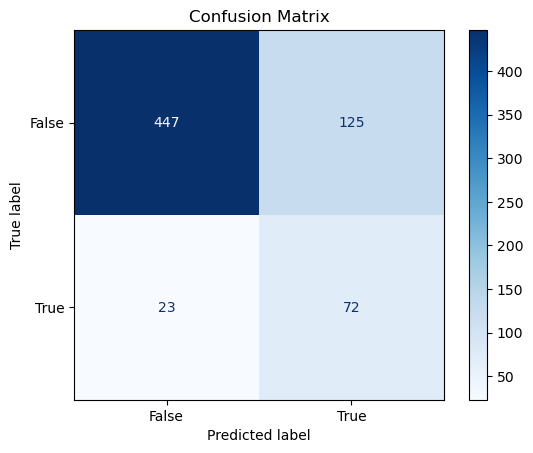

In [13]:
# 11. Confusion Matrix (Print + Plot)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", cm)

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    cmap='Blues',
    values_format="d"
    )

plt.title("Confusion Matrix")
plt.show()

ROC-AUC: 81.43%


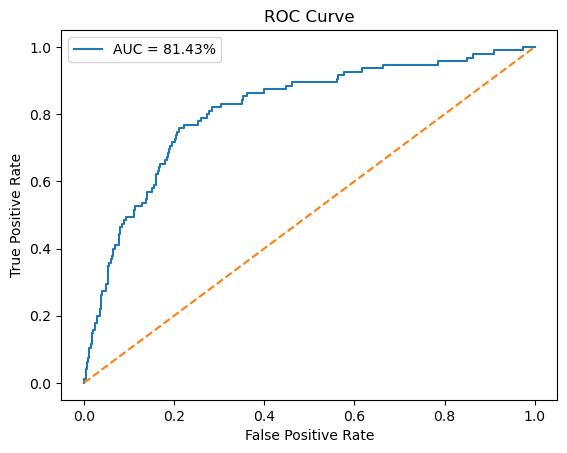

In [14]:
# 12. ROC-AUC (Print + Plot)
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob) * 100:.2f}%")

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc*100:.2f}%")
plt.plot([0, 1], [0, 1], '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()